Simulating decay of 1000 atoms of Tl-208
Half-life: 3.053 minutes
Decay constant μ = ln(2)/τ = 0.003784 s⁻¹
Generated 1000 decay times
Earliest decay: 0.09 s
Latest decay: 1561.86 s


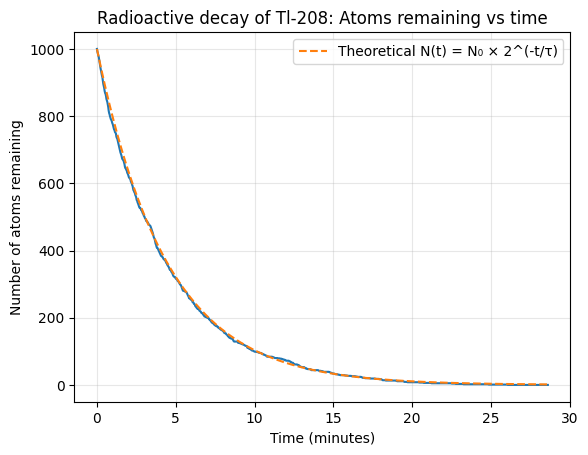


Statistics:
Initial atoms: 1000
Atoms remaining after 1 half-life (3.1 min): 496
Theoretical after 1 half-life: 500.0
Atoms remaining after 2 half-lives: 245
Theoretical after 2 half-lives: 250.0


In [1]:
from random import random
from numpy import arange, sort, log
from pylab import plot, xlabel, ylabel, show, title

# Constants
N = 1000                    # Number of atoms
tau = 3.053 * 60           # Half-life of Tl-208 in seconds (3.053 minutes)
mu = log(2) / tau          # Decay constant (ln(2)/τ)

print(f"Simulating decay of {N} atoms of Tl-208")
print(f"Half-life: {tau/60:.3f} minutes")
print(f"Decay constant μ = ln(2)/τ = {mu:.6f} s⁻¹")

# Generate random decay times using transformation method
# For exponential distribution: t = -(1/μ) * ln(1-z)
# where z is uniform random number between 0 and 1
decay_times = []
for i in range(N):
    z = random()
    # Use transformation: t = -(τ/ln(2)) * ln(1-z)
    t = -(1/mu) * log(1 - z)
    decay_times.append(t)

# Sort the decay times in increasing order
decay_times = sort(decay_times)

print(f"Generated {len(decay_times)} decay times")
print(f"Earliest decay: {decay_times[0]:.2f} s")
print(f"Latest decay: {decay_times[-1]:.2f} s")

# Create time points for plotting
tmax = decay_times[-1] * 1.1  # Plot a bit beyond the last decay
dt = tmax / 1000              # Time step for smooth curve
tpoints = arange(0.0, tmax, dt)

# Calculate number of atoms that have not decayed at each time point
atoms_remaining = []
decay_index = 0  # Index to track position in sorted decay_times array

for t in tpoints:
    # Count how many atoms have decayed by time t
    # Since decay_times is sorted, we just need to find how many are <= t
    while decay_index < len(decay_times) and decay_times[decay_index] <= t:
        decay_index += 1
    
    # Number of atoms remaining = total - number that have decayed
    remaining = N - decay_index
    atoms_remaining.append(remaining)
    
    # Reset decay_index for next iteration (we need to count from beginning each time)
    # Actually, let's use a more efficient approach:
    
# More efficient approach: for each time point, count atoms with decay_time > t
atoms_remaining = []
for t in tpoints:
    # Count atoms whose decay time is greater than t
    remaining = sum(1 for decay_time in decay_times if decay_time > t)
    atoms_remaining.append(remaining)

# Make the plot
plot(tpoints/60, atoms_remaining)  # Convert time to minutes for plotting
xlabel("Time (minutes)")
ylabel("Number of atoms remaining")
title("Radioactive decay of Tl-208: Atoms remaining vs time")

# Add theoretical curve for comparison
theoretical_remaining = [N * (0.5)**(t/tau) for t in tpoints]
plot(tpoints/60, theoretical_remaining, '--', label='Theoretical N(t) = N₀ × 2^(-t/τ)')

# Add legend and grid
from pylab import legend, grid
legend()
grid(True, alpha=0.3)

show()

# Print some statistics
print(f"\nStatistics:")
print(f"Initial atoms: {N}")
print(f"Atoms remaining after 1 half-life ({tau/60:.1f} min): {sum(1 for t in decay_times if t > tau)}")
print(f"Theoretical after 1 half-life: {N/2}")
print(f"Atoms remaining after 2 half-lives: {sum(1 for t in decay_times if t > 2*tau)}")
print(f"Theoretical after 2 half-lives: {N/4}")